In [1]:
# General utilities
import numpy as np
import pandas as pd
from collections import Counter
import time
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Machine Learning models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.pipeline import Pipeline
from scipy import stats

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Interpretability
import shap
import dice_ml

# Abstract
This study presents a novel machine learning (ML) approach to improve the prediction accuracy of soil liquefaction potential for the Philippines, a country prone to seismic activities and associated liquefaction-induced disasters. Leveraging the comprehensive dataset from Idriss and Boulanger’s study on SPT-Based Liquefaction Triggering Procedures, this research aims to develop a predictive model that surpasses the traditional empirical methods in accuracy and interpretability. By incorporating advanced ML techniques, including XGBoost for prediction and SHAP and DiCE for model interpretability and counterfactual analysis, the study seeks to provide a more accurate, understandable, and actionable tool for soil liquefaction risk mitigation.

The research methodology involves data preprocessing, exploratory data analysis, feature selection and engineering, and the application of several ML models, with XGBoost selected based on superior performance. The model's predictions were validated against empirical methods, demonstrating a mean accuracy improvement of 1.69%. Interpretability analysis using SHAP revealed key factors influencing liquefaction risk, while DiCE counterfactual analysis offered actionable insights for soil improvement to mitigate liquefaction potential.

The study concludes that the proposed ML approach can significantly enhance the predictive accuracy and interpretability of soil liquefaction potential assessments, offering a valuable tool for disaster risk reduction strategies in the Philippines and potentially other earthquake-prone regions. Recommendations for future research include expanding the training dataset with local data, exploring advanced feature engineering, integrating the model with Geographic Information Systems (GIS), and incorporating cost-sensitive analysis to balance accuracy and cost-effectiveness in liquefaction risk mitigation efforts.

# Introduction
## Background
The Philippines has a well-documented history of liquefaction-induced disasters. The 1990 Luzon earthquake, for example, triggered extensive liquefaction in Dagupan City, causing severe damage to buildings and displacing thousands. Similar events have occurred in Davao del Sur and other regions, highlighting the vulnerability of the Philippines to this earthquake-related hazard.

However, current methods for assessing liquefaction potential often lack the predictive accuracy and resolution needed for effective mitigation strategies. Traditional analytical methods rely on simplified assumptions and standardized protocols, which may not capture the unique geological and seismic characteristics of specific locations. The resulting risk assessments may be overly conservative or underestimate the true liquefaction threat, leading to inefficient resource allocation and potentially leaving vulnerable areas exposed. A case in point is the soil liquefaction that occurred in 1989, Loma Prieta, California. Using Idriss and Boulanger’s method in assessing liquefaction without including any data regarding the incident, it erroneously stated that the soil from Loma Prieta was not liquefiable.

Recent advancements offer hope for improved liquefaction prediction. Idriss and Boulanger (2021) utilized a comprehensive dataset in their study, providing a wealth of soil properties, earthquake scenarios, and liquefaction observations across diverse geographical locations. This impactful resource, encompassing a wider range of soil parameters and realistic earthquake magnitudes compared to traditional datasets, presents a unique opportunity to develop a more robust and prescriptive model for Philippine contexts. 

Developing a more accurate and interpretable model for predicting soil liquefaction holds the potential to significantly improve disaster risk reduction strategies in the Philippines. By providing a deeper understanding of local vulnerabilities and guiding targeted mitigation efforts, this model can help safeguard lives, infrastructure, and economic well-being in the face of a recurring seismic threat.

## Problem Statement and Objectives
The objectives of this study are as follows:
1. **Develop a predictive model**
    * Estimate the probability of soil liquefaction based on specific soil parameters and earthquake magnitude.
    * Achieve a higher mean accuracy than Idriss and Boulanger's empirical approach.
    * Be interpretable for stakeholders with limited technical expertise, allowing them to understand how the model arrives at its predictions.
2. **Utilize counterfactual analysis**
    * Identify the most effective modifications in soil properties that could help mitigate soil liquefaction.

By incorporating SHAP for interpretability and DiCE for counterfactuals, this study aims to:
1. **Develop a methodology** that can inform recommendations for targeted soil improvement strategies that are not only effective but also easily understandable by stakeholders involved in decision-making.
2. **Compare the model's predictions with the empirical method** provided by Idriss and Boulanger to validate its accuracy and applicability.

# Dataset
The dataset utilized for the study is extracted from Idriss and Boulanger’s study regarding SPT-Based Liquefaction Triggering Procedures. It contains an accumulated history of SPT-based liquefaction cases, holding 254 data points and 27 features. Below are the final list of features of the dataset used in this study.

| Feature          | Description                                                                                     |
|------------------|-------------------------------------------------------------------------------------------------|
| M                | Magnitude of the earthquake on the Richter scale.                                               |
| a                | Peak ground acceleration recorded during the earthquake.                                        |
| LIQ              | Binary indicator (Yes/No) if liquefaction was present.                                          |
| Avg Depth        | Average depth of soil layers at the seismic station, typically in feet.                         |
| GWT Depth        | Depth of the groundwater table at the location, typically in feet.                              |
| N1-60            | Standard penetration test blow counts, normalized to a 60% hammer efficiency.                   |
| FC%              | Fine content percentage, proportion of fine particles in the soil.                             |
| Assessment       | Qualitative assessment of liquefaction potential or other seismic considerations.               |


Two datasets will be utilized:
1. The dataset to be subjected to the seven Machine Learning model with the target variable as `’LIQ’`.
2. The dataset containing only the predicted values of the Empirical Method under the feature `’Assessment’`, and the actual values of the case history under `’LIQ’`.

# Methodology
[PICTURE HERE!]

#### Data Extraction
The dataset utilized for this project is extracted from Idriss and Boulanger’s study regarding SPT-Based Liquefaction Triggering Procedures. It contains an accumulated history of SPT-based liquefaction cases, holding 254 data points and 27 features.

#### Data Loading
The dataset, in the form of an Excel file (.xslx) was loaded into a dataframe using Pandas. This provides us all features regarding soil properties, earthquake scenarios, and liquefaction observations.

#### Data Preprocessing and Feature Engineering
The preprocessing stage focuses on converting the non-numerical values of the target variable, which indicate 'YES' and 'NO' as references to whether the soil is liquefiable or not, into quantitative values of 1 and 0, respectively. This process will be applied to both the `'LIQ'` and 'Assessment' features.

The two datasets for Machine Learning model development and for the Empirical Method are prepared:
1. The dataset to be subjected to the seven Machine Learning model with the target variable as `’LIQ’`.
2. The dataset containing only the predicted values of the Empirical Method under the feature `’Assessment’`, and the actual values of the case history under `’LIQ’`.

The feature engineering implemented in this study is specifically for Porewater Pressure. It is obtained by subtracting `'Effective Vertical Stress'` from `'Total Vertical Stress'`.

#### Exploratory Data Analysis
This section checks for class imbalances and distributions of each of the features used in the study.

#### Feature Selection
Features were selected based on two criteria:
1. Features must be significant to the Machine Learning model, ultimately contributing to the increase of accuracy of predicting whether the soil of the location is liquefiable.
2. Features must be factors practically influenceable by stakeholders to help mitigate soil liquefaction.

The 90% Training and 10% Testing split will be consistently implemented throughout the development of the model.

In order to obtain features that meet the criteria, the selection was executed in an iterative manner, running a combination of features to the seven Machine Learning models to achieve an accuracy score above 80%.

#### Subjecting the Final Dataset to Eight Machine Learning Models
Seven known classifiers were tested in an iterative manner with the previous section, namely:
1. k-Nearest Neighbours Classifier
2. Naive-Bayes Classifier
3. Logistic Regression (with L1 Regularization, with L2 Regularization)
4. Support Vector Classifier
5. Decision-Trees Classifier
6. Random Forest Classifier
7. Gradient Boosting Method
8. XGBoost

In order to ensure reliability of the results when selecting the Machine Learning model, an `accuracy` scoring was used along with averaging the overall score of the GridSearch per Machine Learning model.

#### Select Best Model and Provide Parameters to Beat Mean Score of Empirical Method
With the best Machine Learning model presented, this section aims to beat the Empirical Method’s mean score. This is done by testing 30 Train-Test splits, indicating 30 random scenarios. For each scenario, the accuracy score of the Machine Learning model is obtained. Similarly, the accuracy score of the Empirical Method is obtained. After obtaining all results throughout the 30 scenarios, the Train-Test mean accuracy score for the Machine Learning Model is obtained. Mean accuracy score of the Empirical Method is obtained as well. Finally, the Machine Learning model’s mean test accuracy score is compared to the Empirical Method’s. 

To mitigate the anticipated limitations of the dataset, a t-test was conducted to verify the statistical significance and validity of the results. This approach also addresses the potential issue of overfitting, considering that the machine learning model underwent testing across 30 Train-Test scenarios.


### Data Loading

In [2]:
data = pd.read_excel('soil.xlsx')
df = data.copy()

### Data Preprocessing and Feature Engineering

In [3]:
df.columns

Index(['Location', 'M', 'a', 'LIQ', 'Avg Depth', 'GWT Depth',
       'Total Vertical Stress', 'Effective Vertical Stress', 'Avg N', 'N1-60',
       'Cb', 'Ce', 'Cn', 'Cr', 'Cs', 'FC%', 'N1-60-cs', 'α', 'β', 'rd',
       'K_sigma', 'MSF', 'CSR', 'CSR norm', 'CRR', 'Assessment',
       'Data Source'],
      dtype='object')

In [ ]:
df['LIQ'] = df['LIQ'].map({'Yes': 1, 'No': 0, 'Mar-ginal': 0})
df['Assessment'] = df['Assessment'].map({'Yes': 1, 'No': 0})
df['Porewater Pressure'] = df['Total Vertical Stress'] - df['Effective Vertical Stress']

### Feature Selection

In [4]:
features = [
    'a',
    'M',
    'Avg Depth',
    'GWT Depth',
    'Porewater Pressure',
    'N1-60',
    'FC%',
]

empirical_df = df.loc[:,['LIQ','Assessment']]
target = 'LIQ'

X = df[features]
y = df[target]

### Exploratory Data Analysis

Class distribution:
      0
1  133
0  121
Proportion Chance Criterion (PCC): 50.11%
1.25 * Proportion Chance Criterion: 62.64%


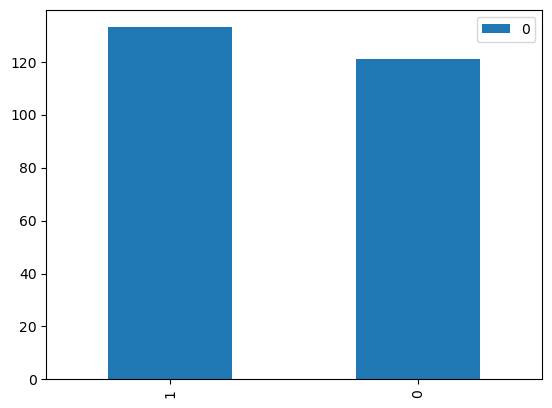

In [5]:
target = 'LIQ'

class_counts = Counter(df[target])
df_class = pd.DataFrame.from_dict(class_counts, orient="index")

# Plotting the class distribution
df_class.plot(kind="bar")

# Calculating the Proportion Chance Criterion (PCC)
proportions = df_class[0] / df_class[0].sum()
pcc = np.sum(proportions**2)

# Calculating 1.25 times PCC
augmented_pcc = 1.25 * pcc

print("Class distribution:\n", df_class)
print("Proportion Chance Criterion (PCC): {:.2f}%".format(100 * pcc))
print(
    "1.25 * Proportion Chance Criterion: {:.2f}%".format(100 * augmented_pcc))

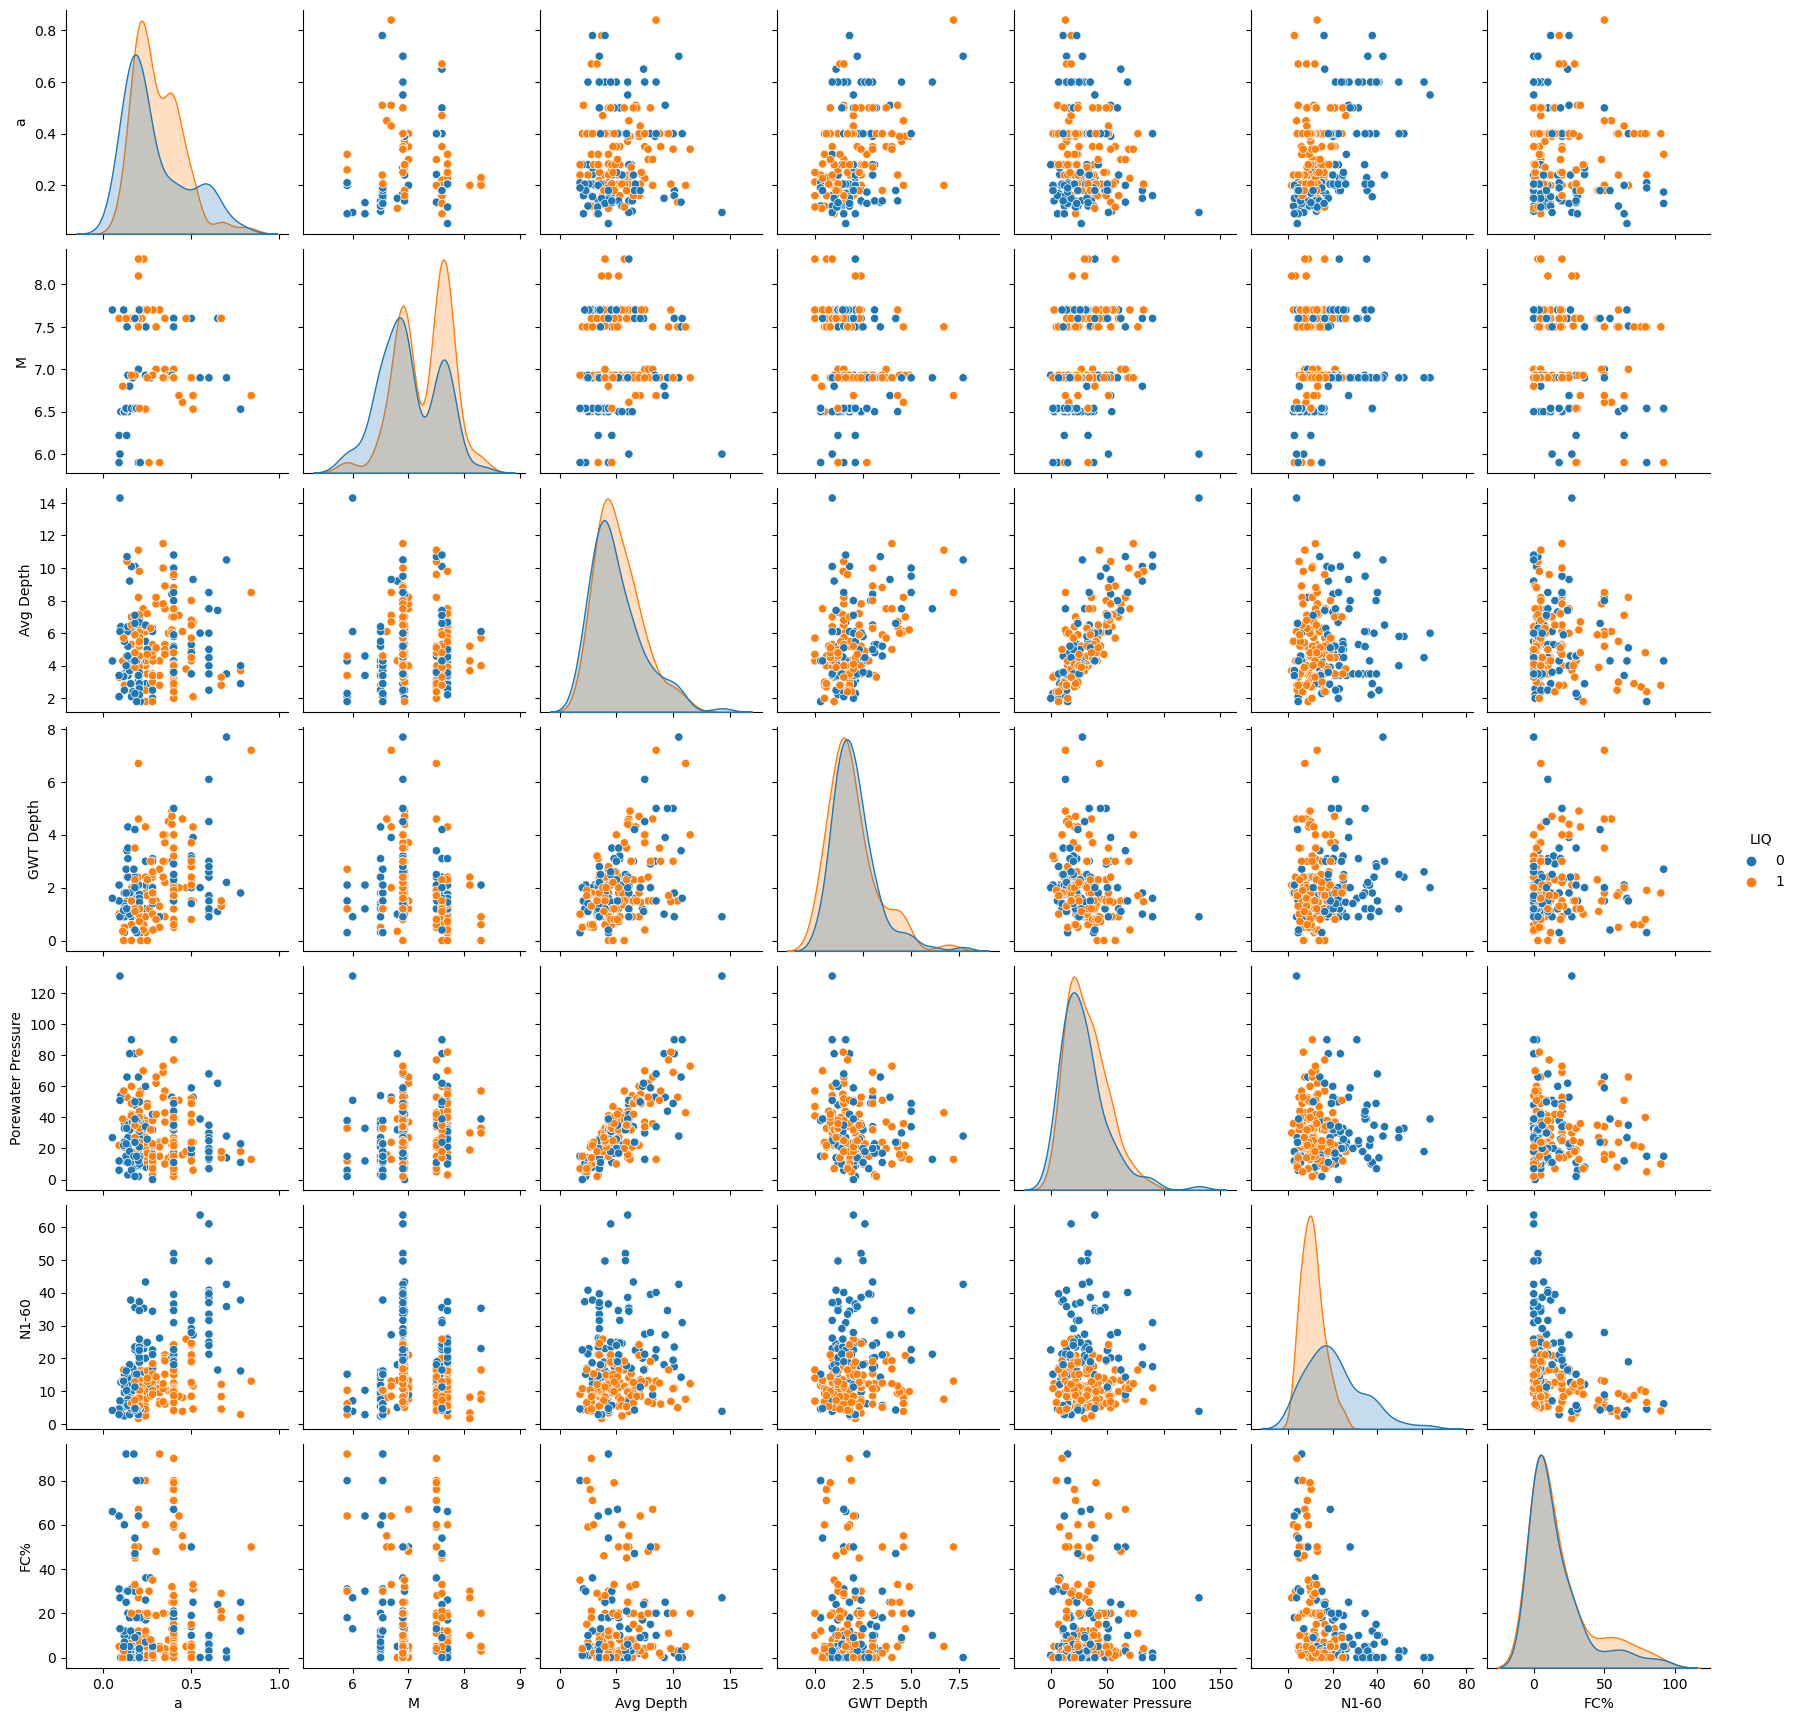

In [6]:
sns.pairplot(X.join(y), hue='LIQ')

### Subjecting the Final Dataset to Eight Machine Learning Models

#### Preparing `X` and `y`

In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=17)

#### GridSearch using Seven ML Models

In [8]:
models = ['XGBoost', 'GBM', 'SVC', 'RandomForest', 'DecistionTree',
          'L1 Logistic Reg', 'L2 Logistic Reg', 'KNN']

C_range = [0.01, 0.1, 0.2, 0.3, 1, 10]
alpha_range = [0.01, 0.1, 0.2, 0.3, 1, 10]
max_depth_range = range(3, 8)
learning_rate_range = [0.01, 0.1, 0.2, 0.5]
n_neighbor_range = range(3,8)

In [9]:
# Prepare the pipeline and parameter grid
steps = [('scaler', StandardScaler()), ('clf', None)]
pipe = Pipeline(steps)
param_grid = [
    {'clf': [SVC()],
         'clf__C': C_range,
         'clf__kernel': ['linear', 'rbf', 'poly']},

    {'clf': [LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)],
         'clf__C': alpha_range},

    {'clf': [LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)],
         'clf__C': alpha_range},

    {'clf': [KNeighborsClassifier()],
         'clf__n_neighbors': n_neighbor_range},

    {'clf': [RandomForestClassifier(random_state=1, n_estimators=200)],
         'clf__max_depth': max_depth_range},
    
    {'clf': [DecisionTreeClassifier(random_state=1)],
         'clf__max_depth': max_depth_range},

    {'clf': [GradientBoostingClassifier(random_state=1, n_estimators=200)],
         'clf__max_depth': max_depth_range,
         'clf__learning_rate': learning_rate_range},

    {'clf': [XGBClassifier(random_state=1, n_estimators=200)],
         'clf__max_depth': max_depth_range,
         'clf__learning_rate': learning_rate_range},
]

In [10]:
grid_search = GridSearchCV(pipe, param_grid, return_train_score=True, cv=10,
                           scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 85 candidates, totalling 850 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', None)]),
             n_jobs=-1,
             param_grid=[{'clf': [SVC()],
                          'clf__C': [0.01, 0.1, 0.2, 0.3, 1, 10],
                          'clf__kernel': ['linear', 'rbf', 'poly']},
                         {'clf': [LogisticRegression(max_iter=1000,
                                                     penalty='l1',
                                                     solver='liblinear')],
                          'clf__C': [0.01, 0.1, 0.2, 0.3, 1, 10]},
                         {'clf': [LogisticRegression(max_iter=1000,
                                                     sol...
                                                max_cat_threshold=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=200, n_jobs=None,
                                                num_parallel_tree=None,
                                                predictor=None, random_state=1, ...)],
                          'clf__learning_rate': [0.01, 0.1, 0.2, 0.5],
                          'clf__max_depth': range(3, 8)}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [11]:
cv_results1 = pd.DataFrame(grid_search.cv_results_)
cv_results1['param_clf'] = cv_results1['param_clf'].apply(str)
result1 = cv_results1.groupby('param_clf').max('rank_test_score') \
            [['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']] \
            .sort_values('mean_test_score', ascending=False)
result1.index = models

In [12]:
result1

,mean_train_score,std_train_score,mean_test_score,std_test_score
XGBoost,0.999512,0.011068,0.868379,0.093406
GBM,1.000000,0.006325,0.850988,0.109101
SVC,0.942489,0.019640,0.836957,0.102784
RandomForest,0.983919,0.010507,0.828854,0.079515
DecistionTree,0.984407,0.018154,0.806324,0.081745
L1 Logistic Reg,0.825058,0.014491,0.802569,0.086615
L2 Logistic Reg,0.825548,0.014965,0.798419,0.103790
KNN,0.874762,0.012089,0.798024,0.097938


### Select Best Model and Provide Parameters to Beat Mean Score of Empirical Method

#### XGBoost v. Empirical Method Across 30 Different TrainVal-Test Splits

In [13]:
m_train = []
m_test = []
e_test = []
for n in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=n)
    param_grid = [
        {'max_depth': [3,4,5,6,7],
         'learning_rate': [0.1, 0.2, 0.3, 0.5],
        }
    ]

    grid_search = GridSearchCV(XGBClassifier(n_estimators=200, random_state=1),
                               param_grid,
                               return_train_score=True,
                               cv=100,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=1)

    grid_search.fit(X_train, y_train)
    model = grid_search.best_estimator_
    m_tr = model.score(X_train, y_train)
    m_ts = model.score(X_test, y_test)
    m_train.append(m_tr)
    m_test.append(m_ts)
    test_score = accuracy_score(model.predict(X_test), df.loc[X_test.index,['LIQ']])
    test_index = X_test.index
    emp_acc = accuracy_score(empirical_df.loc[test_index,['LIQ']],
                               empirical_df.loc[test_index,['Assessment']])
    e_test.append(emp_acc)
    print(f"{m_tr:.4f}   |   {m_ts:.4f}   |   {emp_acc:.4f}")

Fitting 100 folds for each of 20 candidates, totalling 2000 fits
0.9956   |   0.6923   |   0.7692
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
1.0000   |   0.7308   |   0.6538
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
0.9956   |   0.8077   |   0.8077
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
1.0000   |   0.9615   |   0.8462
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
1.0000   |   0.9231   |   0.8846
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
1.0000   |   0.9231   |   0.9615
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
1.0000   |   0.8077   |   0.8077
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
1.0000   |   0.8846   |   0.9231
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
1.0000   |   0.7692   |   0.7308
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
1.0000   |   0.8077   |   0.8462
Fitting 100 folds fo

In [14]:
print(f'Train Mean: {np.mean(m_train):.4f}     |   Test Mean: {np.mean(m_test):.4f}   |   Empirical Score: {np.mean(e_test):.4f}')
print(f'Train std:  {np.std(m_train):.4f}     |   Test std: {np.std(m_test):.4f}    |   Empirical std:{np.std(e_test):.4f}')

Train Mean: 0.9995     |   Test Mean: 0.8469   |   Empirical Score: 0.8300
Train std:  0.0014     |   Test std: 0.0748    |   Empirical std:0.0738


#### T-test

In [15]:
diffs = np.array(m_test)-np.array(e_test)
t_stat, p_value = stats.ttest_1samp(diffs, popmean=0, alternative='greater')
p_value

0.031143883662779304

# Discussion and Results

The model achieved a mean score of 84.69% which is 1.69% higher than the mean score of the empirical model. The Standard Deviation of the accuracy score is 7.48% for the Machine Learning model, and 7.38% for the Empirical Method.

To move forward to the Interpretability and Counterfactual Analysis, GridSearch is performed to attain the final model. A Train-Test split scenario is done once more to ensure higher accuracy than the empirical model.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=17)
param_grid = [
    {'max_depth': [3,4,5,6,7],
     'learning_rate': [0.1, 0.2, 0.3, 0.5],
    }
]

grid_search = GridSearchCV(XGBClassifier(n_estimators=200, random_state=1),
                           param_grid,
                           return_train_score=True,
                           cv=100,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
m_tr = model.score(X_train, y_train)
m_ts = model.score(X_test, y_test)
test_score = accuracy_score(model.predict(X_test), df.loc[X_test.index,['LIQ']])
test_index = X_test.index
emp_acc = accuracy_score(empirical_df.loc[test_index,['LIQ']],
                           empirical_df.loc[test_index,['Assessment']])
# e_test.append(emp_acc)
print(f"Train Accuracy: {m_tr:.4f}   |   Test Accuracy: {m_ts:.4f}   |   Empirical Accuracy: {emp_acc:.4f}")

Fitting 100 folds for each of 20 candidates, totalling 2000 fits
Train Accuracy: 1.0000   |   Test Accuracy: 0.8077   |   Empirical Accuracy: 0.6538


### SHAP for Global Interpretability

Using SHAP enables researchers and stakeholders to understand how the Machine Learning model works throughout its development with the training and testing datasets. For this study, the most interpretable features are `‘N1-60’`, `’M’`, `’a’`, and `’FC%’`.

| Feature | Description |
|---------|-------------|
| N1-60   | Standard penetration test blow counts, normalized to a 60% hammer efficiency. |
| M       | Magnitude of the earthquake on the Richter scale. |
| a       | Peak ground acceleration recorded during the earthquake. |
| FC%     | Fine content percentage, proportion of fine particles in the soil. |

In [42]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
explanation = explainer(X_test)

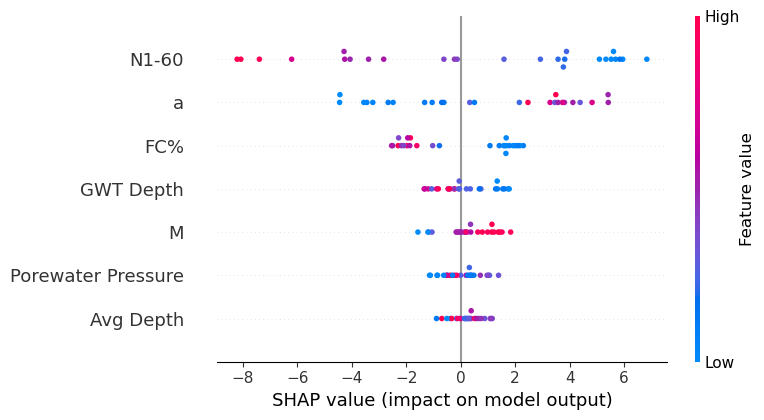

In [43]:
# Visualization
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

According to the Beeswarm plot generated, the higher the `’N1-60’`, the lower the probability of the soil liquefying. This is because `’N1-60’` dictates the soil's density and stiffness. The variables `’M’` and `’a’`, referring to the ground shaking intensity, suggest that lower values mean a lower probability for the soil to liquefy. Finally,`’FC%’`, which refers to the amount of silts and clays in the soil, indicates that soil with more silts and clays is more resistant to liquefaction.

In conclusion, the application of SHAP for global interpretability in this study has provided significant insights into the factors influencing soil liquefaction risk. By analyzing features such as `’N1-60’`, `’M’`, `’a’`, and `’FC%’`, researchers and stakeholders can gain a deeper understanding of the complex interplay between soil properties and seismic activity on liquefaction potential. This enhanced interpretability not only aids in the accurate assessment of liquefaction risks but also supports the development of more effective mitigation strategies, ultimately contributing to the safety and resilience of infrastructure in earthquake-prone areas.

### SHAP for Instance-Level Interpretability

To refine the understanding of the model's predictions, the subsequent section will employ SHAP's instance-level interpretability along with DiCE counterfactual analysis. Analyzing a location known for its liquefiable soil would add greater value to this case study. Therefore, 'McKim Ranch A,' an area with liquefiable soil, will be examined.

#### Case Scenario: McKim Ranch A

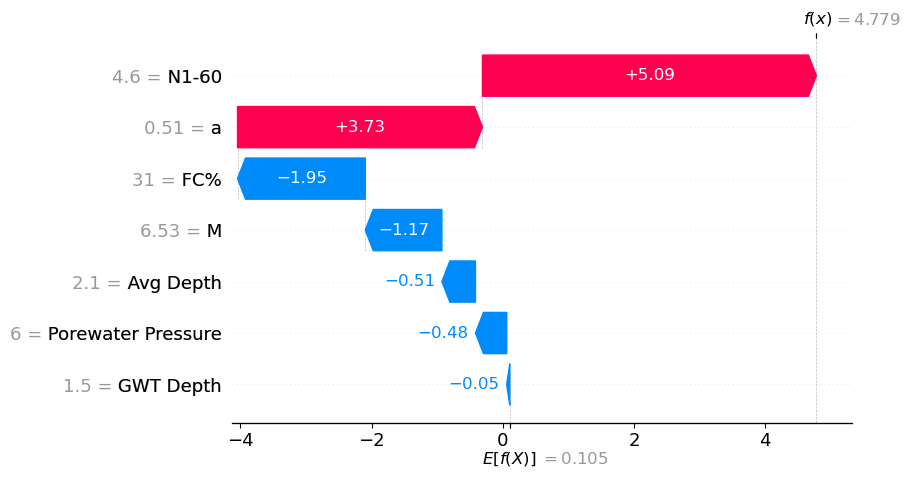

In [61]:
shap.plots.waterfall(explanation[1], max_display=14)

Reading the waterfall plot from bottom to top, the Machine Learning model was initially inclined to predict that the soil would not liquefy. However, because both `'a'` and `'N1-60'` had high values, this was sufficient to entirely shift the prediction towards the soil being liquefiable.

Following the intuition of the model to arrive at its prediction, it enables the stakeholders to see which factors can be influenced and whether it is feasible to mitigate soil liquefaction risks.  This is where DiCE comes into play, offering a strategic approach to exploring and addressing these factors.

### DiCE – Prescriptive Analytics

DiCE (Diverse Counterfactual Explanations) was introduced by Microsoft in 2018, and its ultimate purpose is to show how slight modifications to input features could lead to different outcomes from the Machine Learning model, thereby offering a form of "what-if" analysis to understand and possibly alter the decision made by an ML model​. This tool adds great significant value to geotechnical engineering as it proposes solutions on how to mitigate risks in soil studies.

In the application of DiCE (Diverse Counterfactual Explanations) to the case of McKim Ranch A, the focus is placed solely on adjusting the N1-60 value. This targeted approach suggests that, among the various factors that could be modified to improve soil conditions or meet specific project requirements, the N1-60 value holds the most significant leverage. 

In [46]:
import dice_ml
dice_model = dice_ml.Model(model=model, backend='sklearn')
dice_data = dice_ml.Data(
    dataframe=X_test.join(y_test),
    continuous_features=X_test.columns.tolist(),
    outcome_name='LIQ')
dice_exp = dice_ml.Dice(dice_data, dice_model, method='genetic')

In [60]:
cfes1 = dice_exp.generate_counterfactuals(
    X_test.iloc[[1]],
    total_CFs=3,
    desired_class="opposite",
    features_to_vary=['N1-60']
)
cfes1.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

Query instance (original outcome : 1)


,a,M,Avg Depth,GWT Depth,Porewater Pressure,N1-60,FC%,LIQ
0,0.51,6.53,2.1,1.5,6,4.6,31,1



Diverse Counterfactual set (new outcome: 0)


,a,M,Avg Depth,GWT Depth,Porewater Pressure,N1-60,FC%,LIQ
0,0.5,6.5,-,-,-,14.4,-,0.0
0,0.5,6.5,-,-,-,16.1,-,0.0
0,0.5,6.5,-,-,-,16.2,-,0.0


Proposing an increase in the N1-60 value from 4.6 to 14.4, DiCE suggests a strategic direction for soil stabilization efforts, emphasizing that other variables may remain unchanged. Focusing resources and efforts on enhancing the N1-60 value allows stakeholders to efficiently achieve desired outcomes without necessitating extensive alterations to the site's geotechnical profile.

# Conclusion
This study successfully developed a machine learning model using XGBoost to predict soil liquefaction probability, achieving a mean accuracy of 84.69%. This surpasses the mean accuracy of the established empirical method (83%) by 1.69%, demonstrating the potential of XGBoost for improved liquefaction prediction.

The interpretability analysis using SHAP provided valuable insights into the key factors influencing the model's predictions. Features like N1-60 (soil density), earthquake magnitude (M), peak ground acceleration (a), and fine content percentage (FC%) were identified as significant contributors to liquefaction risk. This understanding empowers stakeholders and researchers to make informed decisions regarding risk assessment and mitigation strategies.

Furthermore, the application of DICE counterfactual analysis allowed for exploring "what-if" scenarios and identifying actionable steps to mitigate liquefaction risks. In the case of McKim Ranch A, increasing the N1-60 value emerged as a strategic recommendation, potentially achieved through soil densification techniques. This targeted approach facilitates efficient resource allocation and minimizes unnecessary alterations to the site's geotechnical profile.

In conclusion, this study demonstrates the effectiveness of XGBoost in predicting soil liquefaction probability, surpassing the accuracy of the conventional empirical method. The interpretability and counterfactual analysis capabilities further enhance the model's value by providing valuable insights for informed decision-making and targeted mitigation strategies. By integrating these findings into future practices, stakeholders can significantly contribute to safeguarding lives, infrastructure, and economic well-being in earthquake-prone regions like the Philippines.

# Recommendations
In light of the discoveries made in the research, specifically with the success of developing the Machine Learning model, and the use of SHAP and DiCE for interpretability, the researchers have recommendations to further refine and enhance soil liquefaction prediction built from this study.

1. **Incorporation of Additional Data:** Expanding the training dataset with data specifically obtained from the Philippines, including diverse soil types and seismic characteristics, could potentially improve the model's accuracy and generalizability within the country's unique geological context.
2. **Advanced Feature Engineering:** Exploring more sophisticated feature engineering techniques, such as feature extraction and dimensionality reduction, could potentially extract deeper insights from the existing data and potentially improve model performance.
3. **Integration with Geographic Information Systems (GIS):** Developing a user-friendly platform that integrates the XGBoost model with GIS capabilities would allow stakeholders to easily assess liquefaction risks across specific locations within the Philippines, facilitating informed decision-making at the regional and national levels.
4. **Cost-Sensitive Analysis:** Integrating cost considerations into the model development and evaluation process is crucial. Stakeholders can make more informed decisions regarding the selection and implementation of soil liquefaction prediction models, ultimately aiming to achieve a balance between accuracy and cost-effectiveness in mitigating liquefaction risks. This involves:
    * **Gathering historical data on past liquefaction events and their associated economic losses.** This data would help estimate the potential costs of false negatives (failing to predict liquefaction that occurs).
    * **Collecting information on the costs associated with implementing various soil improvement techniques.** This data would help assess the potential financial burden of false positives (predicting liquefaction that doesn't occur, leading to unnecessary mitigation efforts).
    
By pursuing these research directions, stakeholders in the Philippines can gain a deeper understanding of soil liquefaction susceptibility and implement more effective mitigation strategies, ultimately fostering a safer and more resilient future for the nation.

# Acknowledgements

We would like to express our sincere gratitude to our professors and mentors who have provided invaluable guidance and support throughout the development of this research project.

Firstly, we would like to thank our professor, **Dr. Christopher Monterola**, for introducing us to the subject matter and providing us with a strong foundation in the field. We appreciate his clear explanations, insightful discussions, and encouragement throughout the semester.

We are especially grateful to **Prof. Leodegario U. Lorenzo II** for his constant support and mentorship throughout the entire project. His willingness to answer our questions, provide feedback on our work, and offer valuable suggestions significantly contributed to the successful completion of this research.

We would also like to acknowledge **Prof. Kristine Ann M. Carandang** for her role as a mentor during the academic term. We appreciate her presence and guidance, which greatly contributed to our overall learning experience.

We are truly grateful for the knowledge, guidance, and support we received from our mentors throughout this project. Their expertise and dedication have significantly enriched our learning experience and helped us achieve this accomplishment.